In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings(action='ignore')

In [94]:
from google.colab import output

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

output.clear()

# 데이터 인풋

In [95]:
train = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/test.csv")

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [96]:
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


- 조식메뉴 컬럼 제거

In [97]:
del train['조식메뉴']
del test['조식메뉴']
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [98]:
train.shape, test.shape

((1205, 11), (50, 9))

In [99]:
# 일자를 datetime 형식으로 변환
train.일자 = pd.to_datetime(train.일자)
test.일자 = pd.to_datetime(test.일자)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   중식메뉴            1205 non-null   object        
 8   석식메뉴            1205 non-null   object        
 9   중식계             1205 non-null   float64       
 10  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 103.7+ KB


- 실근무인원 측정

In [101]:
train['실근무인원'] = train.본사정원수 - train.본사출장자수 - train.본사휴가자수 - train.현본사소속재택근무자수
test['실근무인원'] = test.본사정원수 - test.본사출장자수 - test.본사휴가자수 - test.현본사소속재택근무자수
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0


- 요일을 숫자로 변환

In [102]:
train.요일 = train.요일.map({'월':1,'화':2, '수':3, '목':4, '금':5})
test.요일 = test.요일.map({'월':1,'화':2, '수':3, '목':4, '금':5})
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0


- 년, 월, 일 분리해서 컬럼 생성 

In [103]:
train['년도'] = train.일자.dt.year
train['월'] = train.일자.dt.month
train['일'] = train.일자.dt.day

train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,2016,2,1
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,2016,2,2
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,2016,2,3


In [104]:
test['년도'] = test.일자.dt.year
test['월'] = test.일자.dt.month
test['일'] = test.일자.dt.day

test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,실근무인원,년도,월,일
0,2021-01-27,3,2983,88,182,5,358.0,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2355.0,2021,1,27
1,2021-01-28,4,2983,104,212,409,348.0,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2319.0,2021,1,28
2,2021-01-29,5,2983,270,249,0,294.0,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2170.0,2021,1,29


- null 값 확인 

In [105]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
실근무인원             0
년도                0
월                 0
일                 0
dtype: int64

In [106]:
test.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식메뉴              0
석식메뉴              0
실근무인원             0
년도                0
월                 0
일                 0
dtype: int64

# EDA

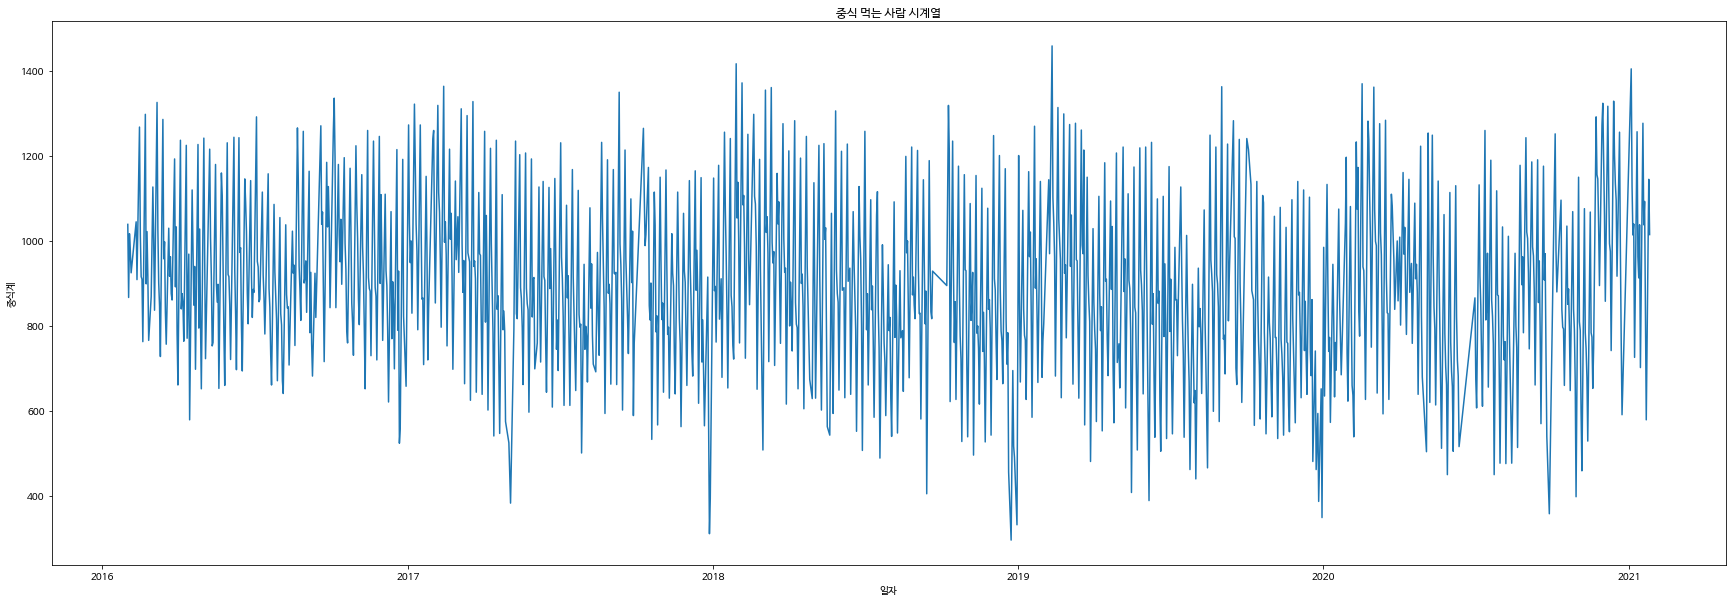

In [107]:
plt.figure(figsize=(30,10))
sns.lineplot(x='일자', y="중식계", data=train)
plt.title("중식 먹는 사람 시계열")
plt.show()

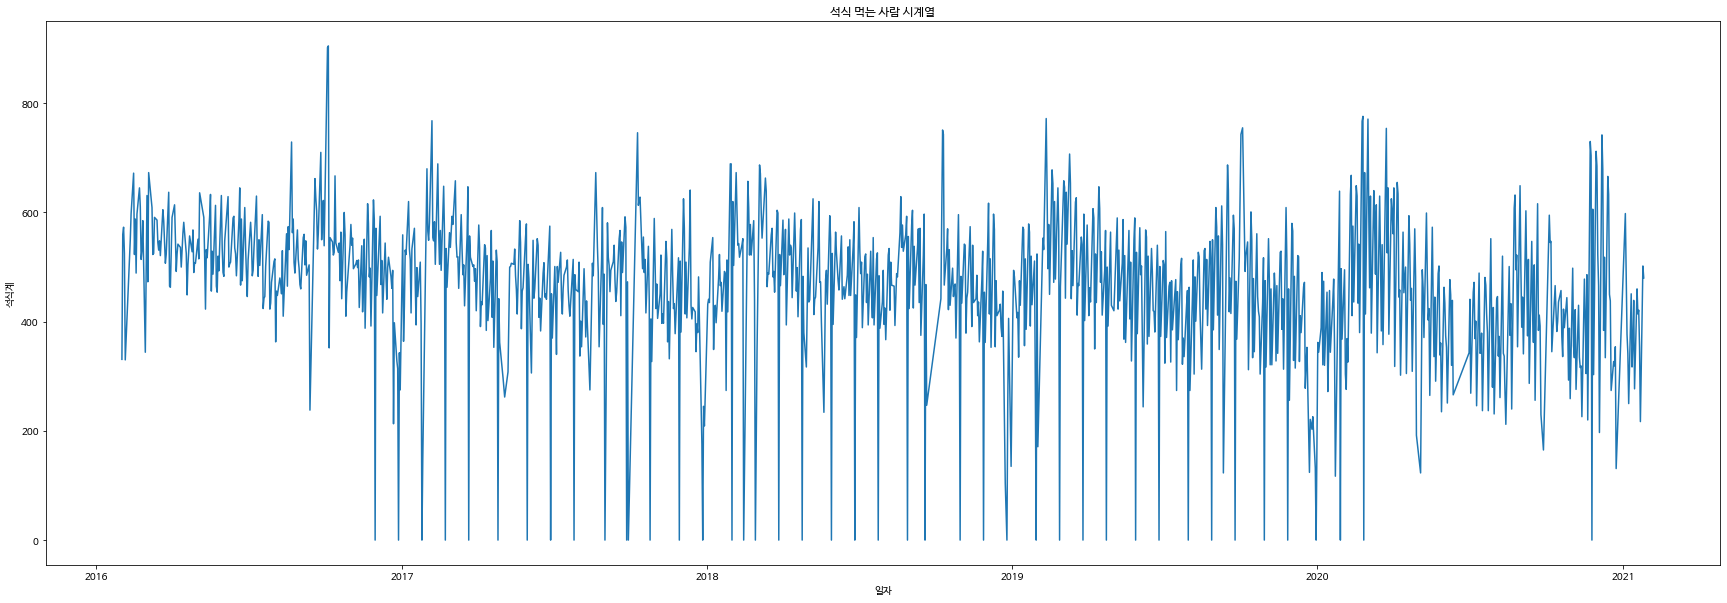

In [108]:
plt.figure(figsize=(30,10))
sns.lineplot(x='일자', y="석식계", data=train)
plt.title("석식 먹는 사람 시계열")
plt.show()

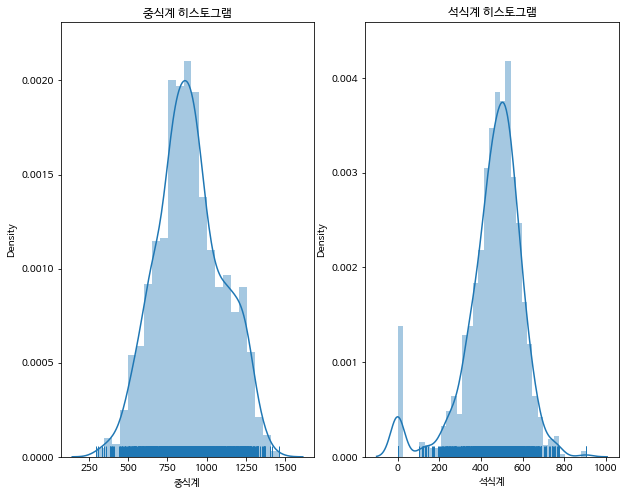

In [109]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.distplot(train.중식계 , kde=True, rug=True)
plt.title("중식계 히스토그램")

plt.subplot(1,2,2)
sns.distplot(train.석식계, kde=True, rug=True)
plt.title("석식계 히스토그램")

plt.show()

석식의 경우 0인 날이 있어보임 -> 처리가 필요

In [110]:
train[train.석식계 == 0].head(8)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,실근무인원,년도,월,일
204,2016-11-30,3,2689,68,207,0,0.0,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2414.0,2016,11,30
224,2016-12-28,3,2705,166,225,0,0.0,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2314.0,2016,12,28
244,2017-01-25,3,2697,79,203,0,0.0,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2415.0,2017,1,25
262,2017-02-22,3,2632,75,252,0,0.0,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,2305.0,2017,2,22
281,2017-03-22,3,2627,53,235,0,0.0,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0,2339.0,2017,3,22
306,2017-04-26,3,2626,45,304,0,0.0,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0,2277.0,2017,4,26
327,2017-05-31,3,2637,43,265,0,0.0,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0,2329.0,2017,5,31
346,2017-06-28,3,2648,58,259,0,0.0,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0,2331.0,2017,6,28


야근 인원이 없어서 없는것일까?

In [111]:
din_0 = train[train.석식계 == 0]

din_0.pivot_table("본사시간외근무명령서승인건수","석식메뉴",aggfunc=np.sum)

,본사시간외근무명령서승인건수
석식메뉴,
,1
*,0
*자기계발의날*,0
가정의날,0
자기계발의날,0
*,0
*,93
* 자기개발의날 *,0
* 자기계발의날 *,0


석식 메뉴가 없거나, 메뉴가 있어도 야근 인원이 없는 날은 석식 식수 인원이 0이다. 

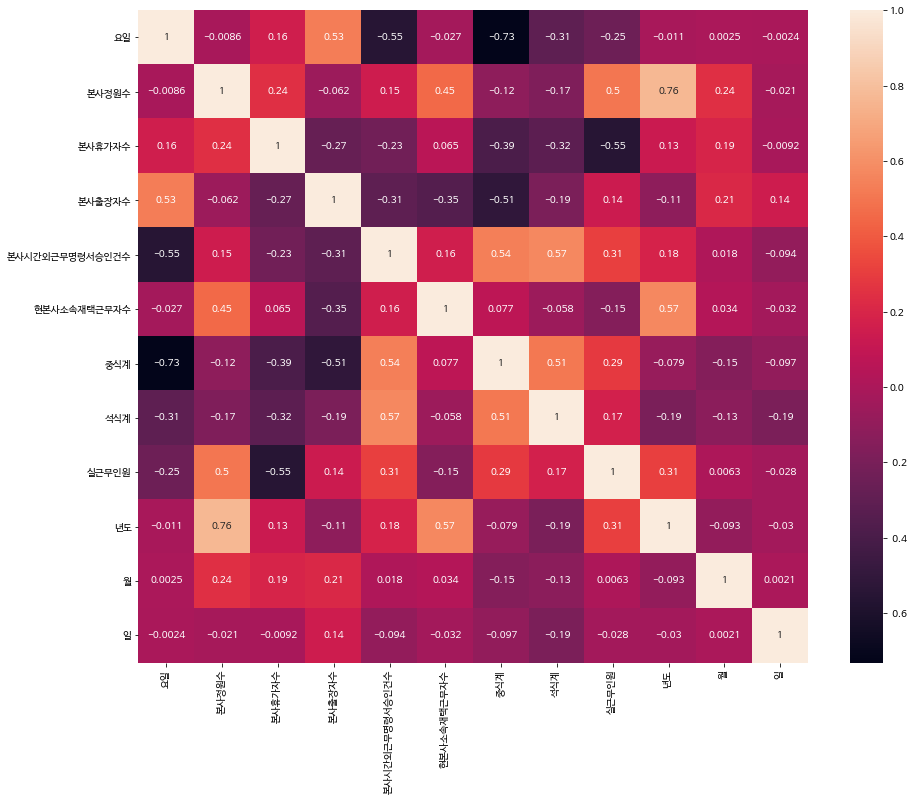

In [112]:
plt.figure(figsize = (15,12))
sns.heatmap(train.corr(),annot = True)

In [113]:
train.corr()['중식계']

요일               -0.731563
본사정원수            -0.115529
본사휴가자수           -0.391975
본사출장자수           -0.512680
본사시간외근무명령서승인건수    0.535611
현본사소속재택근무자수       0.076509
중식계               1.000000
석식계               0.508287
실근무인원             0.286810
년도               -0.078804
월                -0.154664
일                -0.097392
Name: 중식계, dtype: float64

중식계와 다른 변수들의 상관관계를 파악해본 결과, 유의미한 (0.3 이상) 상관관계가 있는 변수는  
요일, 본사휴가자수, 본사 출장자수, 본사시간외근무명령서승인건수 로 보인다. 

In [114]:
train.corr()['석식계']

요일               -0.312112
본사정원수            -0.173852
본사휴가자수           -0.316894
본사출장자수           -0.188164
본사시간외근무명령서승인건수    0.571168
현본사소속재택근무자수      -0.057534
중식계               0.508287
석식계               1.000000
실근무인원             0.172373
년도               -0.194792
월                -0.127142
일                -0.185565
Name: 석식계, dtype: float64

석식계와 다른 변수들의 상관관계를 파악해본 결과, 유의미한 (0.3 이상) 상관관계가 있는 변수는  
요일, 본사휴가자수, 본사시간외근무명령서승인건수로 보인다.  




---

중식계의 경우는 석식계보다 출장자수의 영향을 더 많이 받는다.  


# Case 1 - simple DNN  



### 중식계

In [115]:
lunch_features = ['요일','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수']
X_lunch = train[lunch_features]
y_lunch = train['중식계']

X_lunch.shape, y_lunch.shape

((1205, 4), (1205,))

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
model_lunch = Sequential([
                    Dense(32, input_dim=4, activation='relu'),
                    Dense(8,activation='relu'),
                    Dense(1)
])
model_lunch.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_lunch.compile(
    optimizer = 'adam',
    loss='mean_squared_error'
)

In [119]:
from tensorflow.keras.callbacks import  EarlyStopping
early_stopping = EarlyStopping(monitor='loss',patience=50)

In [120]:
model_lunch.fit(X_lunch, y_lunch, epochs = 500, batch_size=50, verbose = 0, callbacks=[early_stopping])

In [121]:
X_lunch_test = test[lunch_features]
X_lunch_test.head()

,요일,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수
0,3,88,182,5
1,4,104,212,409
2,5,270,249,0
3,1,108,154,538
4,2,62,186,455


In [122]:
lunch_pred = model_lunch.predict(X_lunch_test)

### 석식계

In [123]:
dinner_features = ['요일','본사휴가자수','본사시간외근무명령서승인건수']

X_dinner = train[dinner_features]
y_dinner = train['석식계']

X_dinner.shape, y_dinner.shape

((1205, 3), (1205,))

In [124]:
model_dinner = Sequential([
                    Dense(32, input_dim=3, activation='relu'),
                    Dense(8,activation='relu'),
                    Dense(1)
])
model_dinner.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                128       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [125]:
model_dinner.compile(
    optimizer = 'adam',
    loss='mean_squared_error'
)

In [126]:
model_dinner.fit(X_dinner, y_dinner, epochs = 500, batch_size=50, verbose = 0, callbacks=[early_stopping])

In [127]:
X_dinner_test = test[dinner_features]
X_dinner_test.head()

,요일,본사휴가자수,본사시간외근무명령서승인건수
0,3,88,5
1,4,104,409
2,5,270,0
3,1,108,538
4,2,62,455


In [128]:
dinner_pred = model_dinner.predict(X_dinner_test)



---



In [129]:
submission = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/sample_submission.csv")
submission['중식계'] = lunch_pred
submission['석식계'] = dinner_pred
submission.head()

,일자,중식계,석식계
0,2021-01-27,571.214417,357.003571
1,2021-01-28,745.397949,513.188721
2,2021-01-29,597.495605,335.059052
3,2021-02-01,896.225525,565.336731
4,2021-02-02,786.359070,534.334351


In [130]:
submission.to_csv('simpleDNN.csv', index=False)

# Case2 - Simple DNN with all  

딥러닝은 변수가 많을수록 효과가 좋다는 것을 깜빡...

### 중식계

In [131]:
features = ['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','실근무인원','년도','월','일']
X_lunch = train[features]
X_lunch.shape

(1205, 10)

In [132]:
model_lunch2 = Sequential([
                    Dense(64, input_dim=10, activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(8,activation='relu'),
                    Dense(1)
])
model_lunch2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [133]:
model_lunch2.compile(
    optimizer = 'adam',
    loss='mean_squared_error'
)

In [134]:
model_lunch2.fit(X_lunch, y_lunch, epochs = 500, batch_size=50, verbose = 0, callbacks=[early_stopping])

In [135]:
X_lunch_test = test[features]

lunch_pred = model_lunch2.predict(X_lunch_test)

### 석식계

In [136]:
X_dinner = train[features]
X_dinner.shape

(1205, 10)

In [137]:
model_dinner2 = Sequential([
                    Dense(64, input_dim=10, activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(8,activation='relu'),
                    Dense(1)
])
model_dinner2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [138]:
model_dinner2.compile(
    optimizer = 'adam',
    loss='mean_squared_error'
)

In [139]:
model_dinner2.fit(X_dinner, y_dinner, epochs = 500, batch_size=50, verbose = 0, callbacks=[early_stopping])

In [140]:
X_dinner_test = test[features]

dinner_pred = model_dinner2.predict(X_dinner_test)

In [141]:
submission = pd.read_csv("/content/drive/MyDrive/Data/구내식당_식수인원예측/sample_submission.csv")
submission['중식계'] = lunch_pred
submission['석식계'] = dinner_pred
submission.head()

,일자,중식계,석식계
0,2021-01-27,1044.700439,378.064636
1,2021-01-28,973.986572,403.681335
2,2021-01-29,627.299255,265.275818
3,2021-02-01,1149.652710,479.514557
4,2021-02-02,1060.886475,428.871826


In [142]:
submission.to_csv('simpleDNN2.csv', index=False)